In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')


Importing data
source : https://archive.ics.uci.edu/ml/machine-learning-databases/00360/

### Attribute Information:

0  Date (DD/MM/YYYY)

1  Time (HH.MM.SS)

2  True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3  PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4  True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5  True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6  PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7  True hourly averaged NOx concentration in ppb (reference analyzer)

8  PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9  True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

10  PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11  PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12  Temperature in Â°C

13  Relative Humidity (%)

14  AH Absolute Humidity



### Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.


In [88]:
df = pd.read_csv('AirQualityUCI.csv', delimiter=';',
usecols=['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'])

df.dropna(subset=['Date'], inplace=True)

for col in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
       df[col] = df[col].str.replace(',', '.') # decimal separator changed

df = df.astype({'CO(GT)': np.float64,
 'C6H6(GT)': np.float64,
 'T': np.float64,
 'RH': np.float64,
 'AH': np.float64})


df = df.replace(-200.0, np.nan) # -200 corresponds to a faulty sensor reading

df['DateTime'] = df['Date'] + ' ' + df['Time']
df['DateTime'] = df['DateTime'].apply(lambda x : pd.to_datetime(x, format="%d/%m/%Y %H.%M.%S"))
df.drop(columns = ['Date', 'Time'], inplace=True)

df.rename(columns={'DateTime': 'Date'}, inplace=True)
df.set_index('Date', inplace=True)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


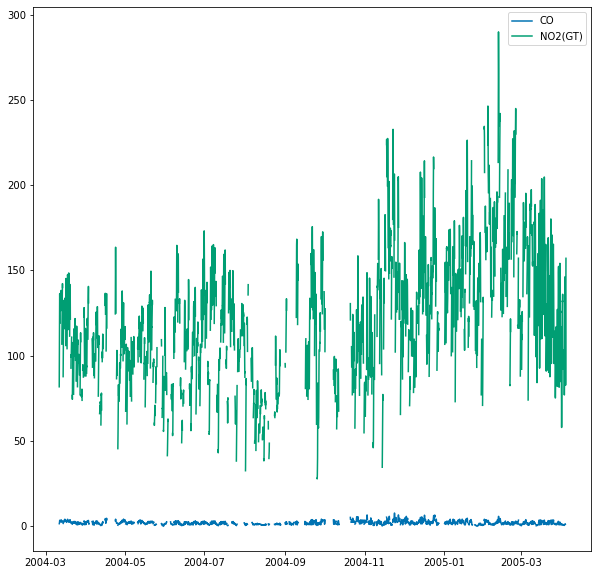

In [123]:
fig, ax = plt.subplots(figsize= (10,10))
ax.plot(df['CO(GT)'].rolling(10, win_type='gaussian').mean(std=5), label='CO', alpha=1)
ax.plot(df['NO2(GT)'].rolling(10, win_type='gaussian').mean(std=5), label='NO2(GT)', alpha=1)
ax.legend()
# ax.set_xlim(pd.to_datetime('2004-03-01'),pd.to_datetime('2004-03-30'))
plt.show()

In [126]:
avgByDate = df.groupby([df.index.date]).mean()


In [127]:
avgByDate

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
2004-03-10,1.966667,1316.500000,86.500000,8.450000,912.333333,132.000000,1167.333333,108.833333,1545.500000,1096.000000,12.033333,54.900000,0.765633
2004-03-11,2.239130,1244.166667,104.500000,7.979167,851.958333,144.391304,1277.250000,99.869565,1522.833333,885.250000,9.837500,64.075000,0.775767
2004-03-12,2.804545,1281.666667,156.347826,12.129167,1008.291667,173.727273,1101.875000,116.272727,1627.291667,1084.375000,11.287500,51.095833,0.663104
2004-03-13,2.695652,1330.666667,139.250000,10.916667,992.833333,184.434783,993.208333,118.869565,1595.791667,1245.916667,12.866667,51.533333,0.732296
2004-03-14,2.469565,1361.125000,116.958333,9.637500,943.916667,146.608696,1001.291667,110.391304,1602.375000,1234.208333,16.012500,48.850000,0.849671
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-03-31,1.387500,1008.125000,NaN,5.220833,749.416667,185.083333,795.666667,100.708333,1176.541667,763.833333,17.550000,50.083333,0.951917
2005-04-01,1.108696,903.291667,NaN,3.412500,663.000000,161.833333,946.875000,107.333333,943.250000,523.958333,15.929167,35.962500,0.636529
2005-04-02,0.854167,890.958333,NaN,2.529167,616.291667,142.375000,991.750000,100.166667,864.333333,481.750000,15.483333,32.225000,0.546167
2005-04-03,1.141667,981.375000,NaN,4.316667,714.708333,167.666667,856.166667,111.125000,985.166667,717.083333,18.383333,33.695833,0.617583


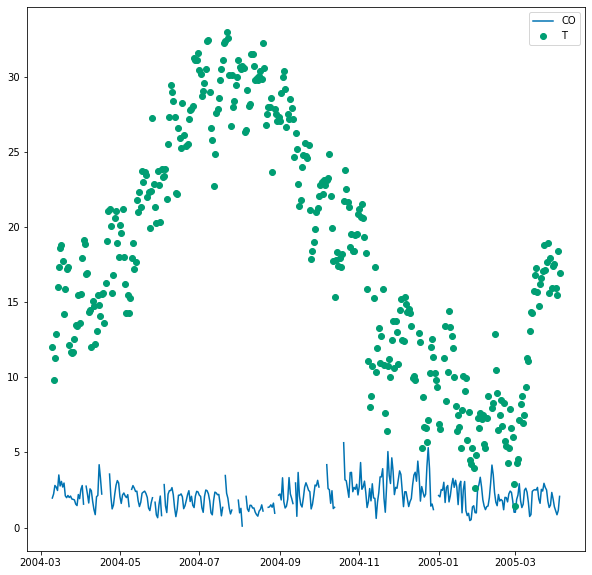

In [137]:
fig, ax = plt.subplots(figsize= (10,10))
ax.plot(avgByDate['CO(GT)'].rolling(1, win_type='gaussian').mean(std=2), label='CO')
ax.plot(avgByDate['T'].rolling(1, win_type='gaussian').mean(std=2), 'o', label='T')
# ax.plot(avgByDate['NO2(GT)'].rolling(2, win_type='gaussian').mean(std=2), label='NO2(GT)', alpha=1)
ax.legend()
# ax.set_xlim(pd.to_datetime('2004-03-01'),pd.to_datetime('2004-03-30'))
plt.show()